# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+2$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from sklearn.svm import SVC

In [2]:
# function that checks if the set is shattered by a family F_{a,b}

def is_shattered(S_n, plot=False):
    n, d = S_n.shape
    n_plots = 2**n - 2

    if plot:
        fig, axs = plt.subplots(2, n_plots, figsize=(n_plots, 2))
        axs[0, 0].set_ylabel("True")
        axs[1, 0].set_ylabel("Pred")
    axi = 0
    out = True
    for i in range(1, n):
        for c in combinations(range(n), i):
            y = np.zeros(shape=n)
            y[list(c)] = 1

            svc = SVC(C=10000, shrinking=False, kernel="linear", tol=1e-5)
            svc.fit(S_n, y)
            y_hat = svc.predict(S_n)

            if plot:
                axs[0, axi].scatter(S_n[:, 0], S_n[:, 1], c=y)
                axs[0, axi].set_xticks([])
                axs[0, axi].set_yticks([])

                axs[1, axi].scatter(S_n[:, 0], S_n[:, 1], c=y_hat)
                axs[1, axi].set_xticks([])
                axs[1, axi].set_yticks([])

            if not (y == y_hat).all():
                out = False
                if plot:
                    for spine in axs[0, axi].spines.values():
                        spine.set_edgecolor("red")
                    for spine in axs[1, axi].spines.values():
                        spine.set_edgecolor("red")
            axi += 1
    if plot:
        if out:
            plt.suptitle("The set IS scattered")
        else:
            plt.suptitle("The set IS NOT scattered")
    return out

In [3]:
S_n = np.array([
    [0, 0],
    [1, 0],
    [0, 1]
])

is_shattered(S_n)

True

In [4]:
S_n = np.array([
    [0, 0],
    [1, 0],
    [2, 0]
])
# points on the same line -> the set is not shattered
is_shattered(S_n)

False

### c)

In [5]:
# there should be 2^n = 2^4 = 16 pictures 
# (or 8 if you don't differentiate class swithes, 
# or 8-1=7 if you don't take into account the case in which all observations belongs to one class)

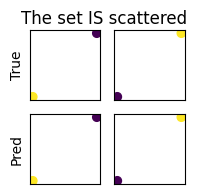

In [6]:
S_n = np.array([
    [0, 0],
    [1, 1],
])

is_shattered(S_n, plot=True);

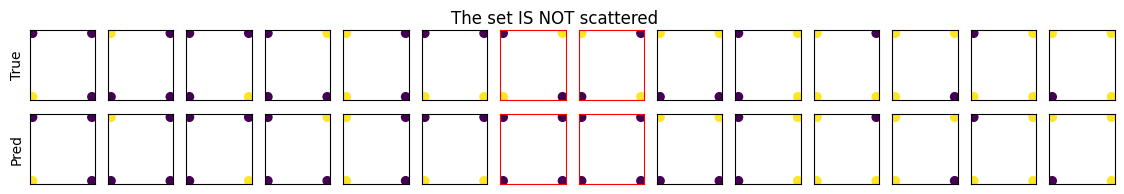

In [7]:
S_n = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
# cases without linear separability are marked with red color
is_shattered(S_n, plot=True);

### d)

In [ ]:
# code
records = []

N = 50
for d in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    n = 2
    while True:
        for i in range(N):
            print(d, n, i)
            S_n = scipy.stats.multivariate_normal.rvs(size=(n, d))
            shattered = is_shattered(S_n)
            if shattered:
                break

        if not shattered:
            break
        else:
            n += 1

    records.append({
        "d": d,
        "VC": n,
    })

In [29]:
df = pd.DataFrame(records)
df

,d,VC
0,2,4
1,3,5
2,4,6
3,5,7
4,6,8
5,7,9
6,8,10
7,9,11
8,10,12


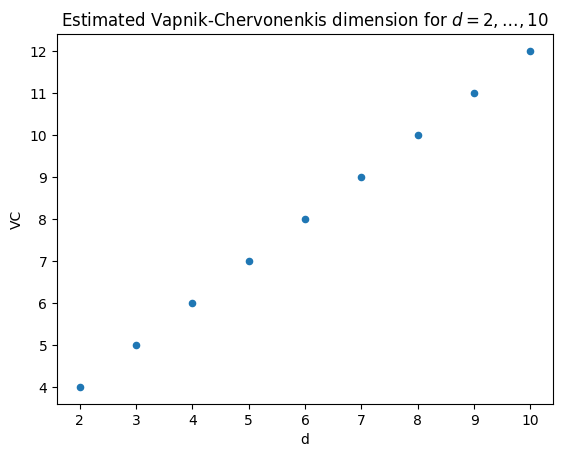

In [32]:
df.plot.scatter(x="d", y="VC")
plt.title(r"Estimated Vapnik-Chervonenkis dimension for $d=2, \ldots, 10$")
plt.show()

The estimation results are consistent with the fact from the lecture:
* $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+2$

### e)

In [ ]:
# A hint: change a kernel in SVM